In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["S_Len", "S_Width", "P_Len", "P_Width", "class"]
df = pd.read_csv("iris.data", names = cols)
df.head()

,S_Len,S_Width,P_Len,P_Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["class"] = (df["class"] == "Iris-setosa").astype(int)
df.head()

,S_Len,S_Width,P_Len,P_Width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


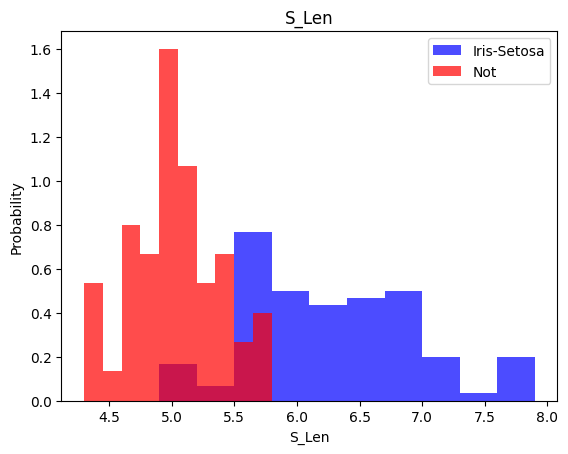

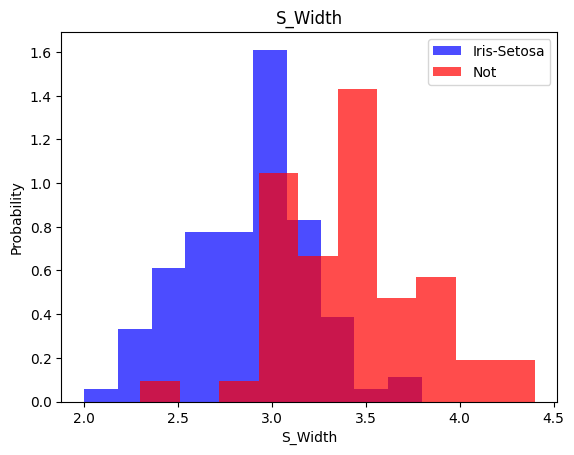

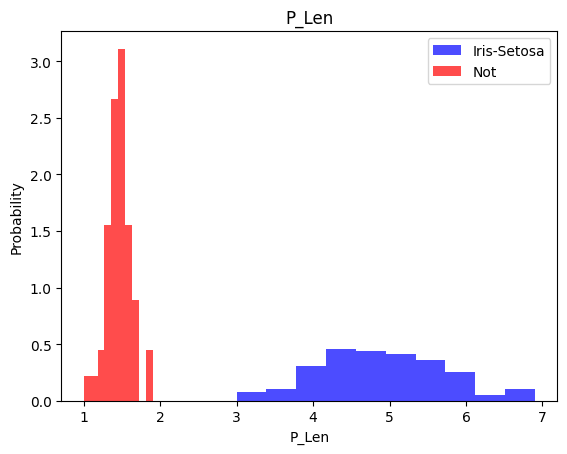

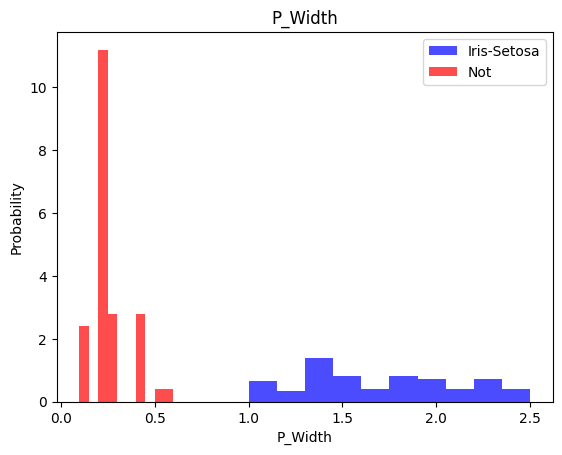

In [6]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 0][label], color= "blue", label= "Iris-Setosa", alpha= 0.7, density=True)
  plt.hist(df[df["class"] == 1][label], color= "red", label= "Not", alpha= 0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

**Training and Testing on the Dataset**

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def normalize(dataframe, oversample=False):
    if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].values
        y = dataframe.iloc[:, -1].values
    else:
        X = dataframe[:, :-1]
        y = dataframe[:, -1]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [9]:
train, X_train, y_train = normalize(train, oversample=True)
valid, X_valid, y_valid = normalize(valid, oversample=False)
test, X_test, y_test = normalize(test, oversample=False)

In [10]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary-Crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [15]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Use shape[1] for the number of features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [13]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

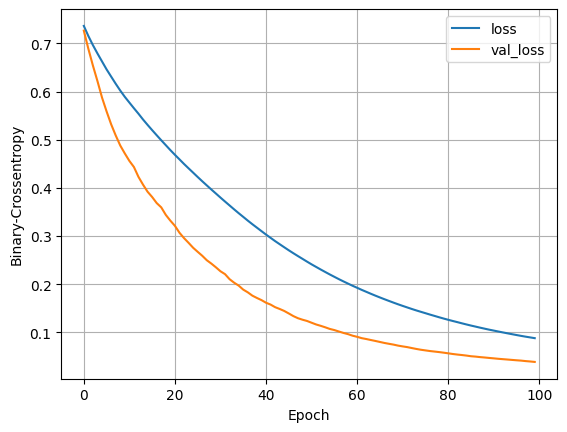

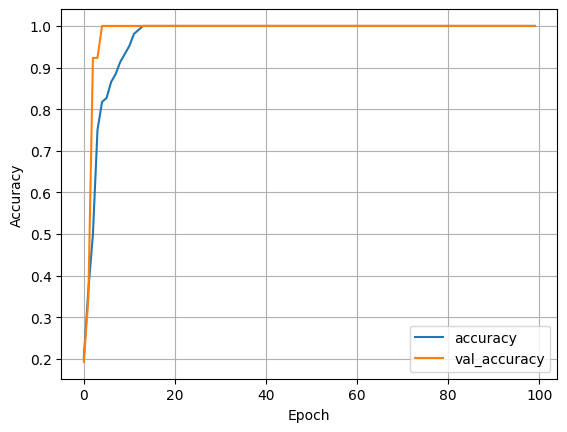

In [16]:
plot_loss(history)
plot_accuracy(history)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0167 
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0132 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0150 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0174  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0161 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0156  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0153  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0144  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0156 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0151  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0154 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000

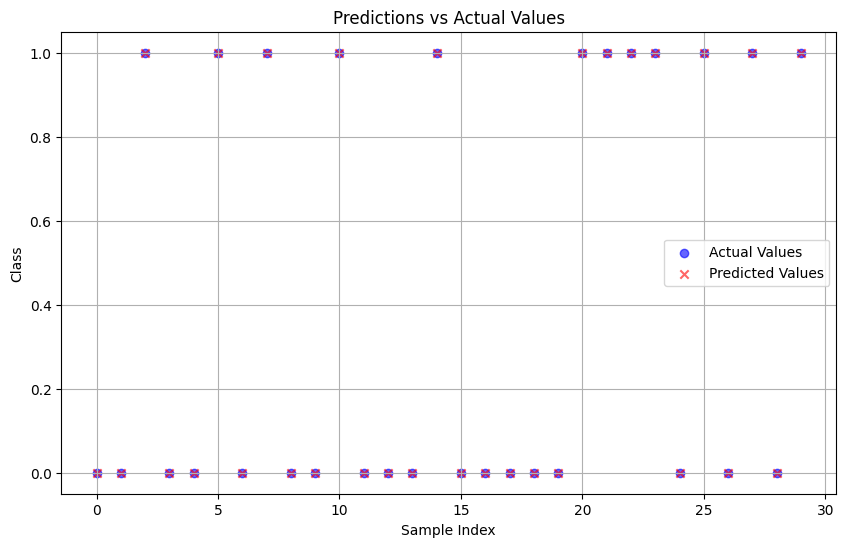

In [24]:
nn_model.fit(X_train, y_train, epochs=100, batch_size=32)
y_hat = nn_model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', alpha=0.6, color="blue")
plt.scatter(range(len(y_hat)), y_hat, label='Predicted Values', alpha=0.6, marker='x', color="red")
plt.title('Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
accuracy_score(y_test, y_hat)

1.0